# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#POINTS POR MINUTO -> RATIO PARA USAR QUANDO FAZER MODELOS -> Inicio

In [3]:
players_df = pd.read_csv("data/players.csv")
players_teams_df = pd.read_csv("data/players_teams.csv")
teams_df = pd.read_csv("data/teams.csv")
teams_post_df = pd.read_csv("data/teams_post.csv")
coaches_df = pd.read_csv("data/coaches.csv")
series_post_df = pd.read_csv("data/series_post.csv")
awards_df = pd.read_csv("data/awards_players.csv")

datasets = {
    'Players': players_df,
    'Players-Teams': players_teams_df,
    'Teams': teams_df,
    'Teams Post': teams_post_df,
    'Coaches': coaches_df,
    'Series Post': series_post_df,
    'Awards': awards_df
}

print("=== DATASET OVERVIEW ===")
for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"  Shape: {df.shape}")
    print(f"  Columns: {len(df.columns)}")
    print(f"  Missing values: {df.isnull().sum().sum()}")
    print(f"  Data types:\n{df.dtypes.value_counts()}")

=== DATASET OVERVIEW ===

Players:
  Shape: (893, 10)
  Columns: 10
  Missing values: 1127
  Data types:
object     6
int64      3
float64    1
Name: count, dtype: int64

Players-Teams:
  Shape: (1876, 43)
  Columns: 43
  Missing values: 0
  Data types:
int64     40
object     3
Name: count, dtype: int64

Teams:
  Shape: (142, 61)
  Columns: 61
  Missing values: 430
  Data types:
int64      50
object     10
float64     1
Name: count, dtype: int64

Teams Post:
  Shape: (80, 5)
  Columns: 5
  Missing values: 0
  Data types:
int64     3
object    2
Name: count, dtype: int64

Coaches:
  Shape: (162, 9)
  Columns: 9
  Missing values: 0
  Data types:
int64     6
object    3
Name: count, dtype: int64

Series Post:
  Shape: (70, 9)
  Columns: 9
  Missing values: 0
  Data types:
object    6
int64     3
Name: count, dtype: int64

Awards:
  Shape: (95, 4)
  Columns: 4
  Missing values: 0
  Data types:
object    3
int64     1
Name: count, dtype: int64


In [4]:
players_df = pd.read_csv("data/players.csv")
players_teams_df = pd.read_csv("data/players_teams.csv")
teams_df = pd.read_csv("data/teams.csv")
teams_post_df = pd.read_csv("data/teams_post.csv")
coaches_df = pd.read_csv("data/coaches.csv")
series_post_df = pd.read_csv("data/series_post.csv")
awards_df = pd.read_csv("data/awards_players.csv")

In [5]:
# Players Dataset - Detailed Analysis
print("Players dataset shape:", players_df.shape)
print("\nColumns:", list(players_df.columns))
print("\nData types:")
print(players_df.dtypes)
print("\nMissing values per column:")
print(players_df.isnull().sum())
print("\nDescriptive statistics for numeric columns:")
print(players_df.describe())

# Position distribution
print("\nPosition distribution:")
print(players_df['pos'].value_counts())

# Height and weight by position
print("\nHeight/Weight stats by position:")
print(players_df.groupby('pos')[['height', 'weight']].describe())

Players dataset shape: (893, 10)

Columns: ['bioID', 'pos', 'firstseason', 'lastseason', 'height', 'weight', 'college', 'collegeOther', 'birthDate', 'deathDate']

Data types:
bioID            object
pos              object
firstseason       int64
lastseason        int64
height          float64
weight            int64
college          object
collegeOther     object
birthDate        object
deathDate        object
dtype: object

Missing values per column:
bioID             0
pos              78
firstseason       0
lastseason        0
height            0
weight            0
college         167
collegeOther    882
birthDate         0
deathDate         0
dtype: int64

Descriptive statistics for numeric columns:
       firstseason  lastseason      height      weight
count        893.0       893.0  893.000000  893.000000
mean           0.0         0.0   65.500560  145.415454
std            0.0         0.0   20.940425   61.275703
min            0.0         0.0    0.000000    0.000000
25%       

# Players

pos
G      309
F      230
C      130
F-C     70
G-F     55
F-G     12
C-F      9
Name: count, dtype: int64


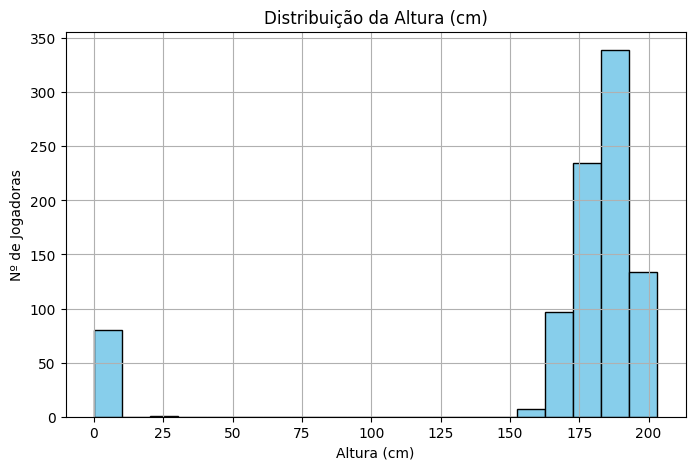

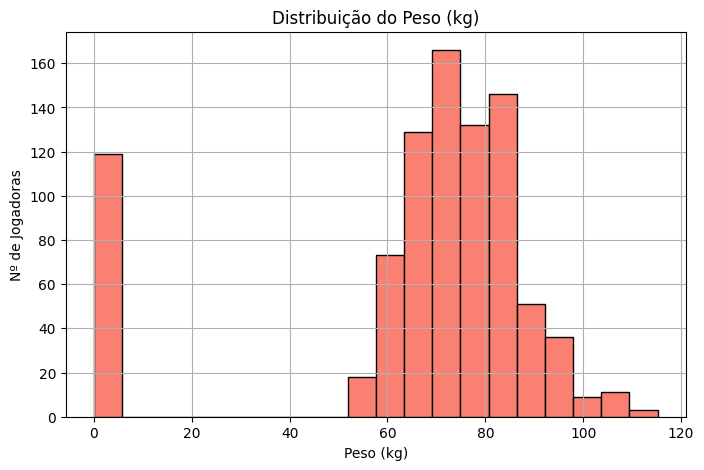

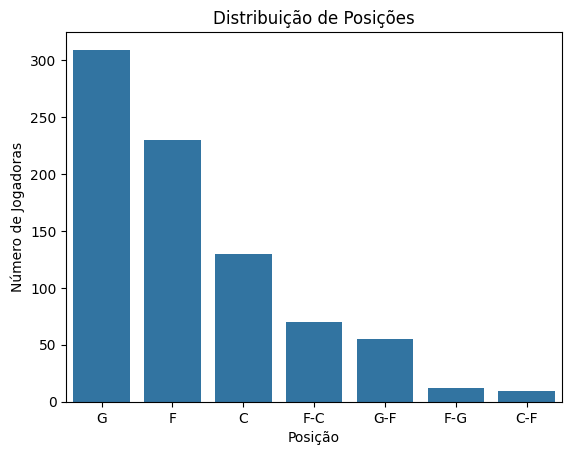

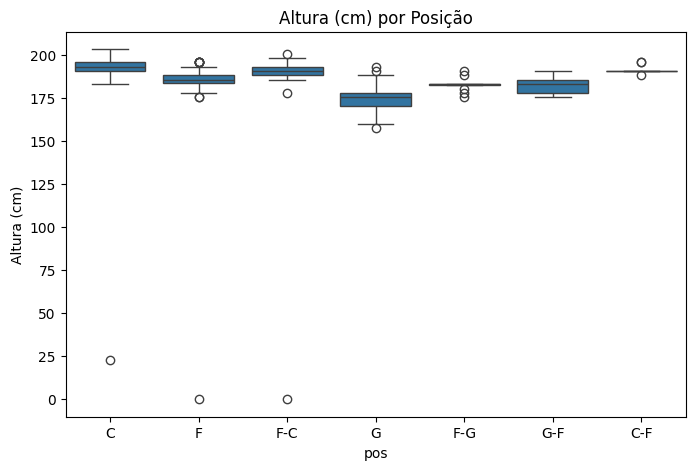

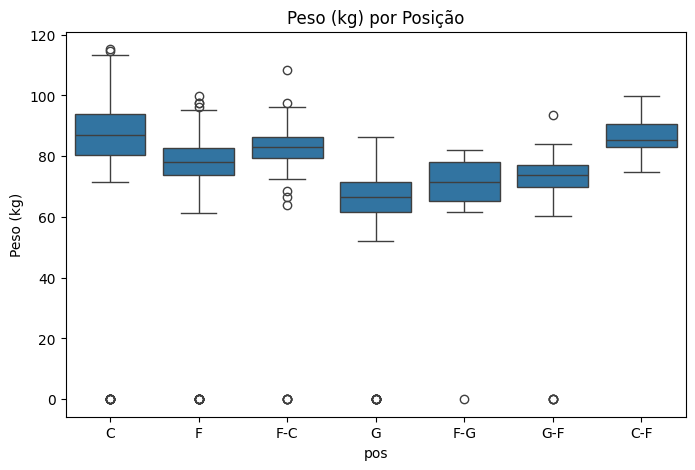

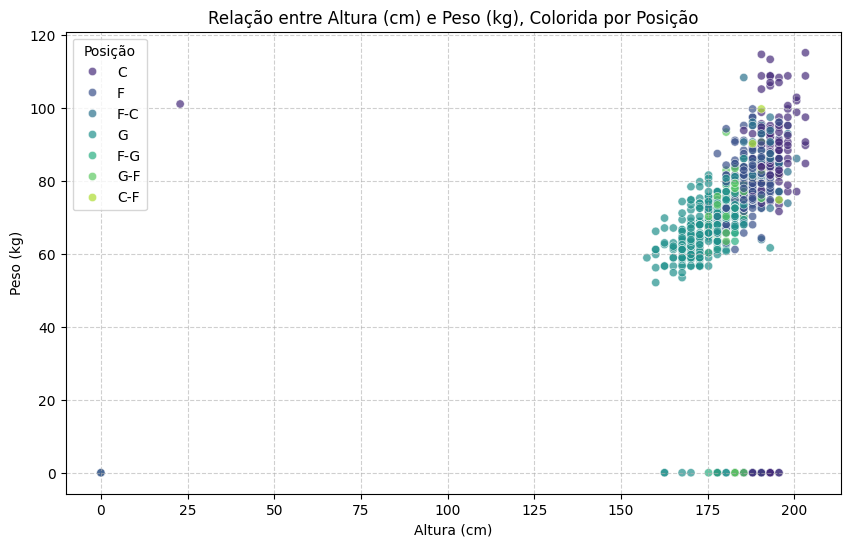

In [26]:
# ================================================================
# CONSTANTES DE CONVERSÃO
# ================================================================
INCH_TO_CM = 2.54
LBS_TO_KG = 0.453592

# ================================================================
# ANÁLISE EXPLORATÓRIA DE DADOS (EDA) EM CM E KG
# ================================================================

# Linha -> lista de jogadores com dados biográficos e fisicos
players_df.head()

# Nota: O describe() ainda usa os dados originais (inches/lbs)
# Se quiser o describe em CM/KG, precisa de criar as colunas temporariamente.
# print(players_df[['height','weight']].describe()) 
print(players_df['pos'].value_counts()) # Jogadores por posição (C, F, G)

# --- 1. HISTOGRAMA DA ALTURA (CM) ---
plt.figure(figsize=(8,5))
# Conversão: height (inches) * 2.54
(players_df['height'] * INCH_TO_CM).hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição da Altura (cm)")
plt.xlabel("Altura (cm)")
plt.ylabel("Nº de Jogadoras")
plt.show()

# --- 2. HISTOGRAMA DO PESO (KG) ---
plt.figure(figsize=(8,5))
# Conversão: weight (lbs) * 0.453592
(players_df['weight'] * LBS_TO_KG).hist(bins=20, color="salmon", edgecolor="black")
plt.title("Distribuição do Peso (kg)")
plt.xlabel("Peso (kg)")
plt.ylabel("Nº de Jogadoras")
plt.show()

# --- 3. DISTRIBUIÇÃO DE POSIÇÕES (MANTÉM-SE) ---
sns.countplot(data=players_df, x="pos", order=players_df['pos'].value_counts().index)
plt.title("Distribuição de Posições")
plt.xlabel("Posição")
plt.ylabel("Número de Jogadoras")
plt.show()

# --- 4. BOXPLOT: ALTURA (CM) POR POSIÇÃO ---
plt.figure(figsize=(8,5))
# Conversão no eixo Y: height * 2.54
sns.boxplot(data=players_df, x="pos", y=players_df['height'] * INCH_TO_CM)
plt.title("Altura (cm) por Posição")
plt.ylabel("Altura (cm)") # Alterar label do eixo
plt.show()

# --- 5. BOXPLOT: PESO (KG) POR POSIÇÃO ---
plt.figure(figsize=(8,5))
# Conversão no eixo Y: weight * 0.453592
sns.boxplot(data=players_df, x="pos", y=players_df['weight'] * LBS_TO_KG)
plt.title("Peso (kg) por Posição")
plt.ylabel("Peso (kg)") # Alterar label do eixo
plt.show()

# --- 6. GRÁFICO DE DISPERSÃO (ADICIONADO ANTERIORMENTE) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=players_df,
    x=players_df["height"] * INCH_TO_CM,
    y=players_df["weight"] * LBS_TO_KG,
    hue="pos",
    palette="viridis",
    alpha=0.7
)
plt.title("Relação entre Altura (cm) e Peso (kg), Colorida por Posição")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.legend(title="Posição")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()





# Players Teams

                GP      minutes       points     rebounds      assists  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000   
mean     24.320896   501.269190   176.261727    78.722814    39.031983   
std      10.460614   359.566117   161.983839    69.210226    40.147037   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      17.000000   165.000000    41.000000    21.000000     8.000000   
50%      29.000000   459.000000   129.000000    63.000000    26.000000   
75%      32.000000   826.250000   284.000000   119.000000    57.250000   
max      34.000000  1234.000000   860.000000   363.000000   236.000000   

            steals       blocks    turnovers  
count  1876.000000  1876.000000  1876.000000  
mean     19.600746     9.065032    36.480277  
std      17.542694    13.497853    27.956998  
min       0.000000     0.000000     0.000000  
25%       5.000000     1.000000    11.000000  
50%      16.000000     4.000000    32.000000  
75% 

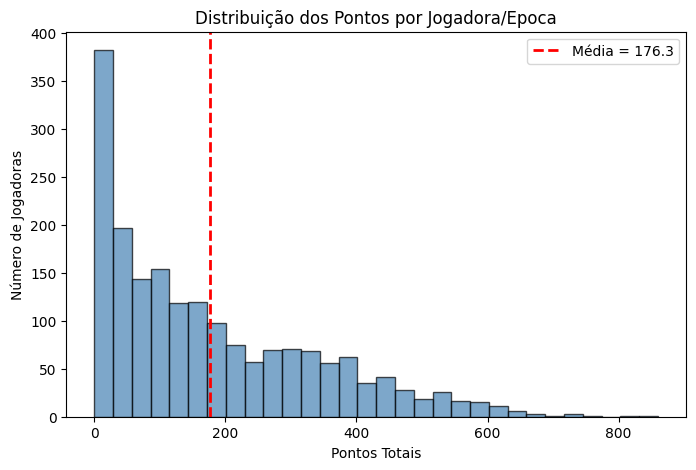

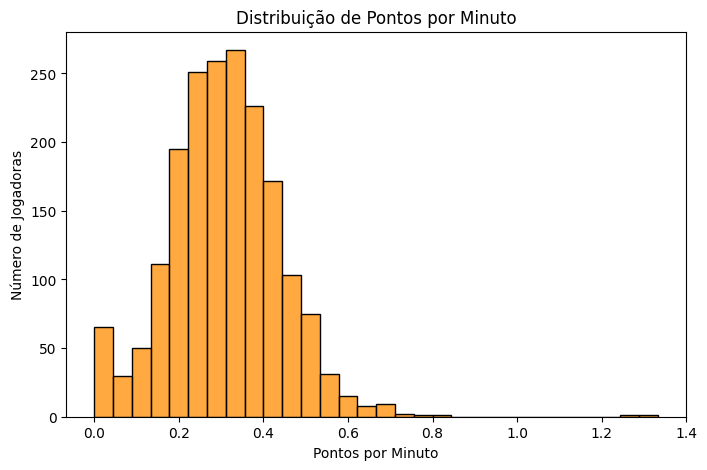

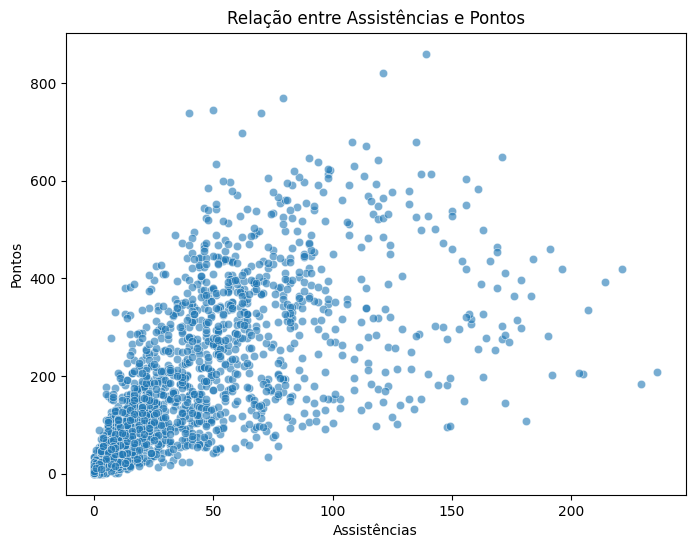

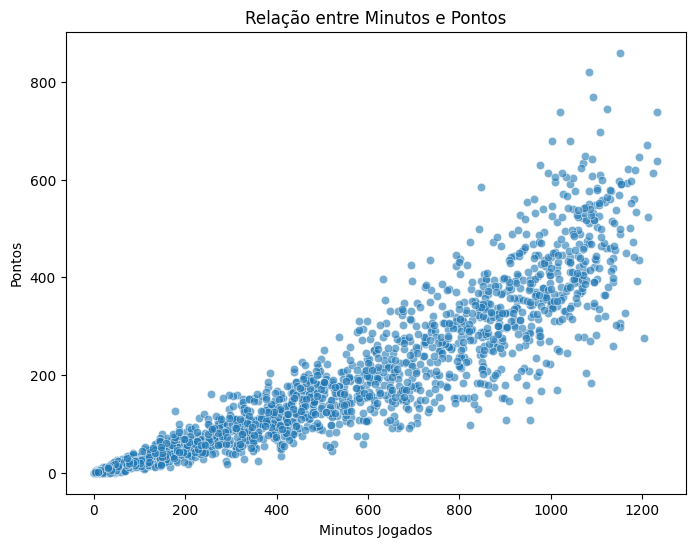

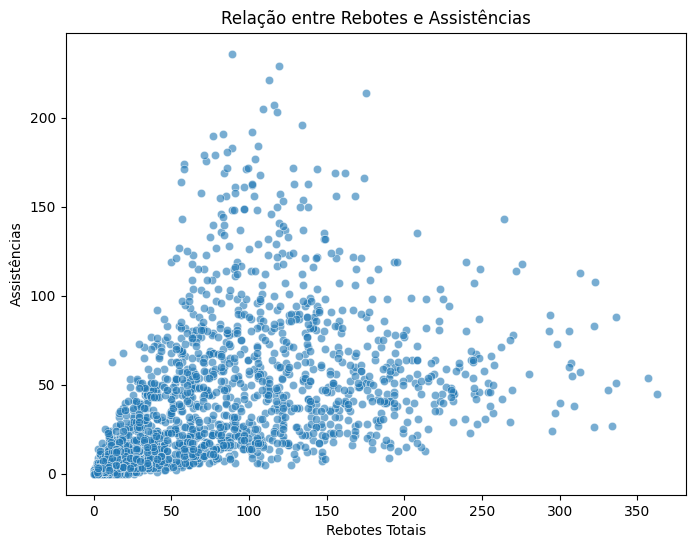

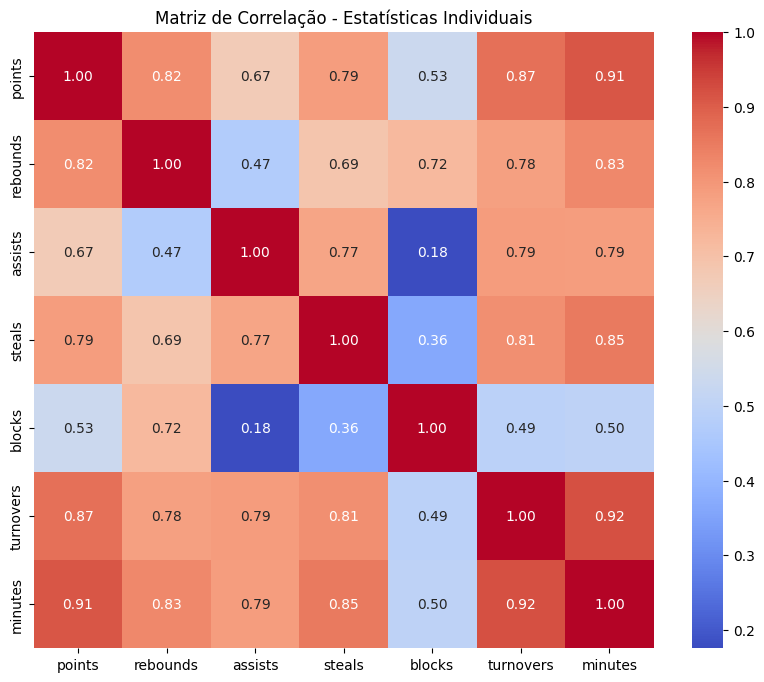

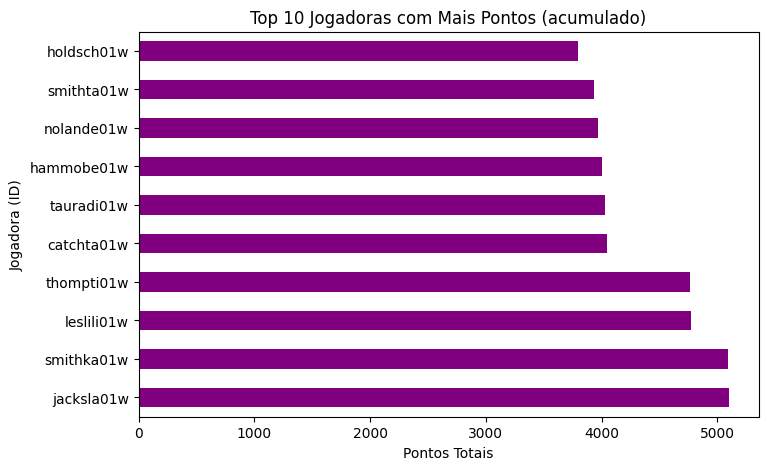

   year  num_players
0     1          204
1     2          206
2     3          204
3     4          175
4     5          163
5     6          165
6     7          176
7     8          166
8     9          187
9    10          159


/tmp/ipykernel_126267/1694309299.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=players_per_year, x='year', y='num_players', palette='viridis')


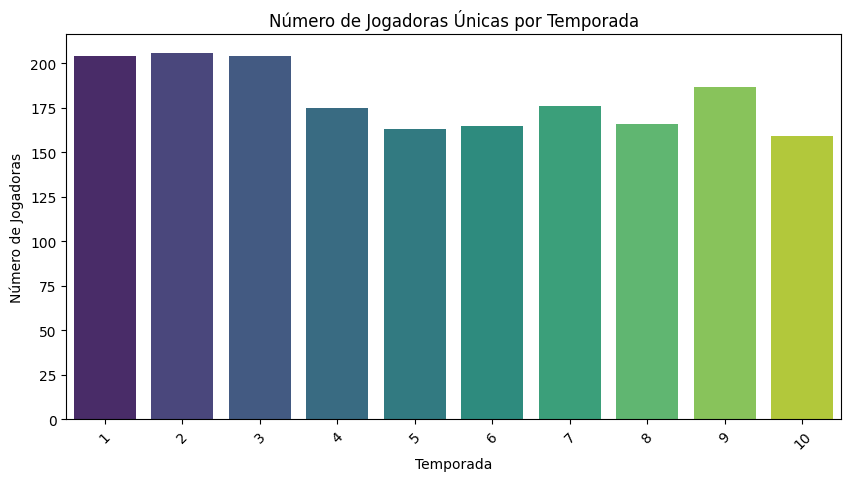

In [7]:
#representa o desempenho de um jogador (player) numa época (year) por uma equipa (tmID).
players_teams_df.head()
# ------------------------------
# 1. Estatísticas descritivas básicas
# ------------------------------
print(players_teams_df[['GP','minutes','points','rebounds','assists','steals','blocks','turnovers']].describe())

# ------------------------------
# 2. Distribuição de Pontos
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(players_teams_df['points'], bins=30, color="steelblue", edgecolor="black", alpha=0.7)
plt.axvline(players_teams_df['points'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f"Média = {players_teams_df['points'].mean():.1f}")
plt.title("Distribuição dos Pontos por Jogadora/Epoca")
plt.xlabel("Pontos Totais")
plt.ylabel("Número de Jogadoras")
plt.legend()
plt.show()

# ------------------------------
# 3. Pontos por Minuto
# ------------------------------
players_teams_df['points_per_min'] = players_teams_df['points'] / players_teams_df['minutes']
plt.figure(figsize=(8,5))
sns.histplot(players_teams_df['points_per_min'], bins=30, color="darkorange")
plt.title("Distribuição de Pontos por Minuto")
plt.xlabel("Pontos por Minuto")
plt.ylabel("Número de Jogadoras")
plt.show()

# ------------------------------
# 4. Assistências vs Pontos
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=players_teams_df, x='assists', y='points', alpha=0.6)
plt.title("Relação entre Assistências e Pontos")
plt.xlabel("Assistências")
plt.ylabel("Pontos")
plt.show()

# ------------------------------
# 5. Minutos vs Pontos
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=players_teams_df, x='minutes', y='points', alpha=0.6)
plt.title("Relação entre Minutos e Pontos")
plt.xlabel("Minutos Jogados")
plt.ylabel("Pontos")
plt.show()

# ------------------------------
# 6. Rebotes vs Assistências (estilo defensivo/ofensivo)
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=players_teams_df, x='rebounds', y='assists', alpha=0.6)
plt.title("Relação entre Rebotes e Assistências")
plt.xlabel("Rebotes Totais")
plt.ylabel("Assistências")
plt.show()

# ------------------------------
# 7. Correlação geral entre estatísticas principais
# ------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(players_teams_df[['points','rebounds','assists','steals','blocks','turnovers','minutes']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Estatísticas Individuais")
plt.show()

# ------------------------------
# 8. Top Jogadoras (por Pontos)
# ------------------------------
top_players = players_teams_df.groupby('playerID')['points'].sum().sort_values(ascending=False).head(10)
top_players.plot(kind='barh', figsize=(8,5), color="purple")
plt.title("Top 10 Jogadoras com Mais Pontos (acumulado)")
plt.xlabel("Pontos Totais")
plt.ylabel("Jogadora (ID)")
plt.show()

players_per_year = players_teams_df.groupby('year')['playerID'].nunique().reset_index(name='num_players')
print(players_per_year)

plt.figure(figsize=(10,5))
sns.barplot(data=players_per_year, x='year', y='num_players', palette='viridis')
plt.title('Número de Jogadoras Únicas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Número de Jogadoras')
plt.xticks(rotation=45)
plt.show()


Players-Teams dataset shape: (1876, 44)

Columns: ['playerID', 'year', 'stint', 'tmID', 'lgID', 'GP', 'GS', 'minutes', 'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade', 'dq', 'PostGP', 'PostGS', 'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds', 'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks', 'PostTurnovers', 'PostPF', 'PostfgAttempted', 'PostfgMade', 'PostftAttempted', 'PostftMade', 'PostthreeAttempted', 'PostthreeMade', 'PostDQ', 'points_per_min']

Years covered: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Teams represented: 20

Performance metrics summary:
                GP           GS      minutes       points     rebounds  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000   
mean     24.320896    12.438166   501.269190 

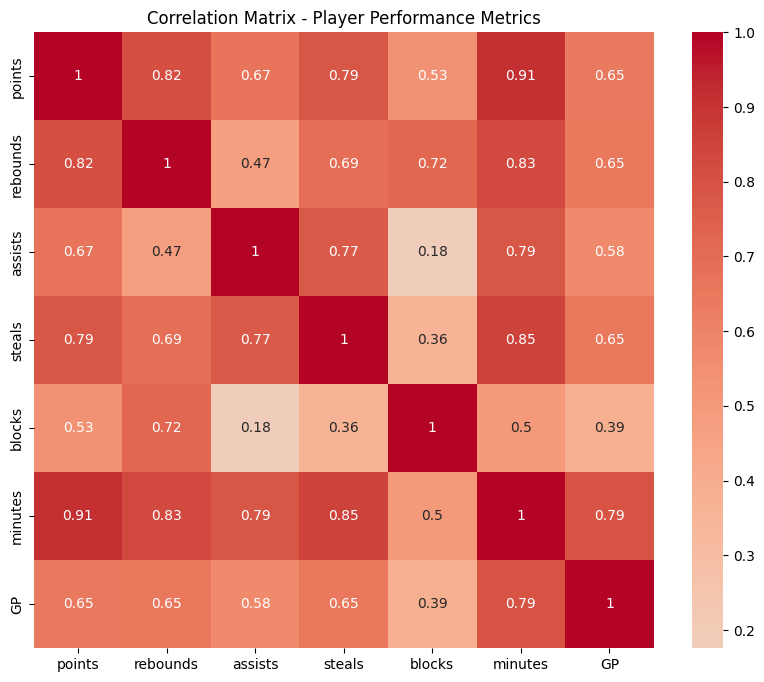

In [8]:
# Players-Teams Dataset - Detailed Analysis
print("Players-Teams dataset shape:", players_teams_df.shape)
print("\nColumns:", list(players_teams_df.columns))
print("\nYears covered:", sorted(players_teams_df['year'].unique()))
print("\nTeams represented:", players_teams_df['tmID'].nunique())

# Key performance metrics
performance_cols = ['GP', 'GS', 'minutes', 'points', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF']
print("\nPerformance metrics summary:")
print(players_teams_df[performance_cols].describe())

# Per-game stats
players_teams_df['ppg'] = players_teams_df['points'] / players_teams_df['GP']
players_teams_df['rpg'] = players_teams_df['rebounds'] / players_teams_df['GP']
players_teams_df['apg'] = players_teams_df['assists'] / players_teams_df['GP']

print("\nPer-game averages:")
print(players_teams_df[['ppg', 'rpg', 'apg']].describe())

# Correlation analysis
corr_cols = ['points', 'rebounds', 'assists', 'steals', 'blocks', 'minutes', 'GP']
corr_matrix = players_teams_df[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Player Performance Metrics')
plt.show()

In [9]:
import pandas as pd
import glob

# Ler todos os CSVs da pasta data/
for path in glob.glob("data/*.csv"):
    df = pd.read_csv(path)
    if "year" in df.columns:
        years = sorted(df["year"].unique())
        print(f"{path}: {years}")


data/series_post.csv: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
data/coaches.csv: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
data/players_teams.csv: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
data/awards_players.csv: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
data/teams_post.csv: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
data/teams.csv: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]


# Teams

Vitórias: count    142.000000
mean      16.661972
std        4.999131
min        4.000000
25%       13.000000
50%       17.000000
75%       20.000000
max       28.000000
Name: won, dtype: float64
Derrotas: count    142.000000
mean      16.661972
std        4.999131
min        4.000000
25%       14.000000
50%       16.000000
75%       20.000000
max       30.000000
Name: lost, dtype: float64
Pontos Marcados (Ataque): count     142.000000
mean     2366.274648
std       243.154860
min      1822.000000
25%      2185.250000
50%      2340.000000
75%      2531.500000
max      3156.000000
Name: o_pts, dtype: float64
Pontos Sofridos (Defesa): count     142.000000
mean     2366.260563
std       234.615384
min      1788.000000
25%      2196.750000
50%      2339.500000
75%      2522.750000
max      3031.000000
Name: d_pts, dtype: float64


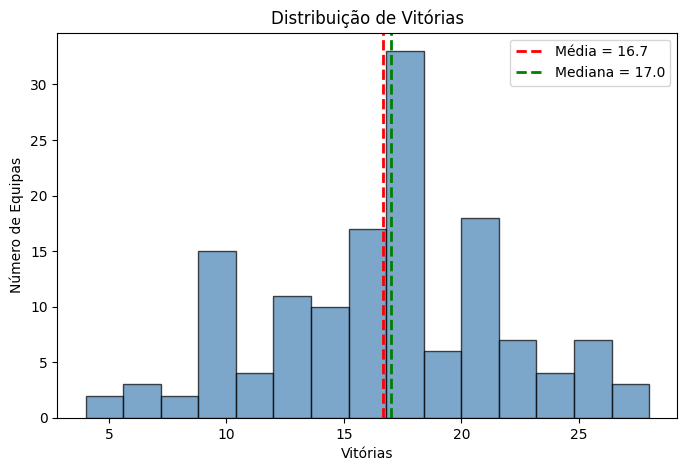

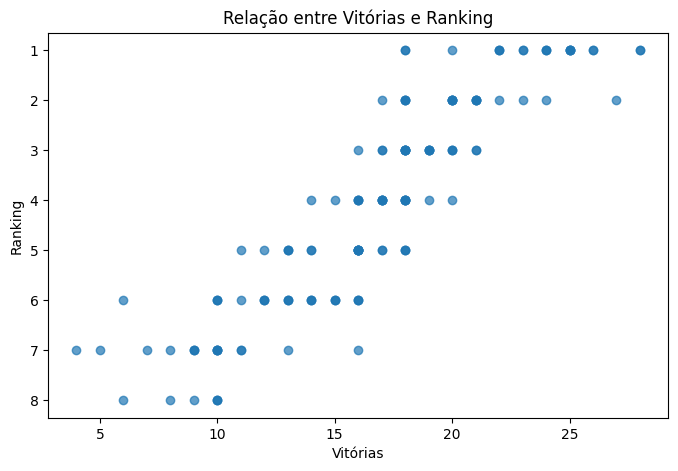

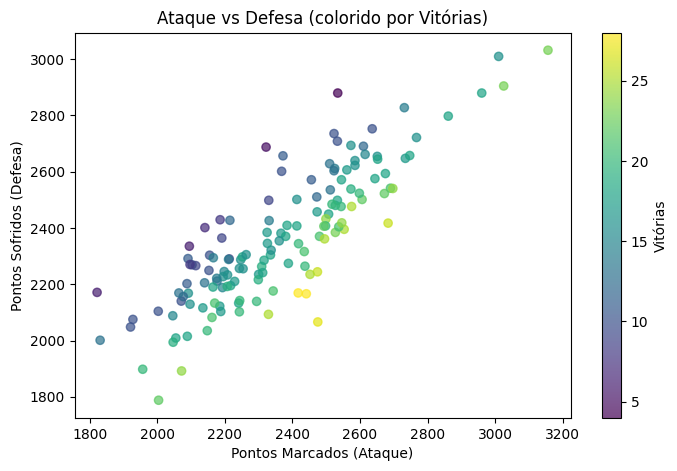

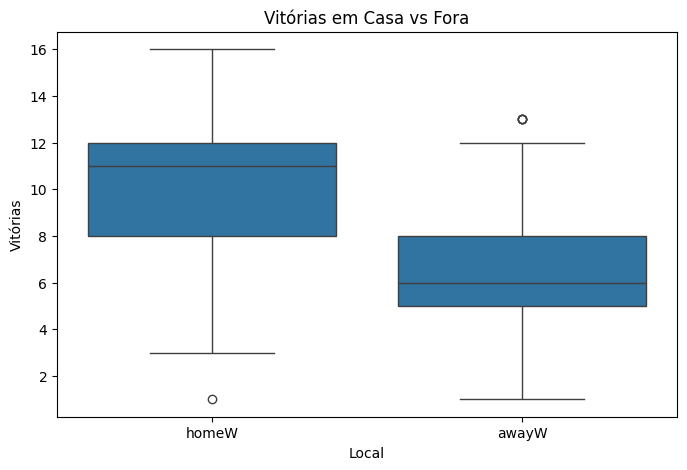

In [10]:
#Linha -> Resumo da equipa em toda a temporada

# ------------------------------
# 1. Estatísticas descritivas
# ------------------------------
print("Vitórias:", teams_df['won'].describe()) #INUTIL
print("Derrotas:", teams_df['lost'].describe()) #INUTIL
print("Pontos Marcados (Ataque):", teams_df['o_pts'].describe())
print("Pontos Sofridos (Defesa):", teams_df['d_pts'].describe())

# ------------------------------
# 2. Distribuição de Vitórias
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(teams_df['won'], bins=15, color="steelblue", edgecolor="black", alpha=0.7)
plt.axvline(teams_df['won'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f"Média = {teams_df['won'].mean():.1f}")
plt.axvline(teams_df['won'].median(), color='green', linestyle='dashed', linewidth=2, 
            label=f"Mediana = {teams_df['won'].median():.1f}")
plt.title("Distribuição de Vitórias")
plt.xlabel("Vitórias")
plt.ylabel("Número de Equipas")
plt.legend()
plt.show()

# ------------------------------
# 3. Relação Vitórias ↔ Ranking
# ------------------------------
plt.figure(figsize=(8,5))
plt.scatter(teams_df['won'], teams_df['rank'], alpha=0.7)
plt.xlabel("Vitórias")
plt.ylabel("Ranking")
plt.title("Relação entre Vitórias e Ranking")
plt.gca().invert_yaxis()  # Rank 1 é o melhor → eixo invertido
plt.show()

# ------------------------------
# 4. Ataque vs Defesa (cor por Vitórias)
# ------------------------------
plt.figure(figsize=(8,5))
sc = plt.scatter(teams_df['o_pts'], teams_df['d_pts'], 
                 c=teams_df['won'], cmap="viridis", alpha=0.7)
plt.colorbar(sc, label="Vitórias")
plt.xlabel("Pontos Marcados (Ataque)")
plt.ylabel("Pontos Sofridos (Defesa)")
plt.title("Ataque vs Defesa (colorido por Vitórias)")
plt.show()

# ------------------------------
# 5. Casa vs Fora
# ------------------------------
plt.figure(figsize=(8,5))
home_away = teams_df[['homeW','awayW']].melt(var_name='Local', value_name='Vitórias')
sns.boxplot(data=home_away, x='Local', y='Vitórias')
plt.title("Vitórias em Casa vs Fora")
plt.show()


# Teams Results

Percentagem de vitórias: count    80.000000
mean      0.387387
std       0.260842
min       0.000000
25%       0.333333
50%       0.366667
75%       0.547980
max       1.000000
Name: win_percentage, dtype: float64


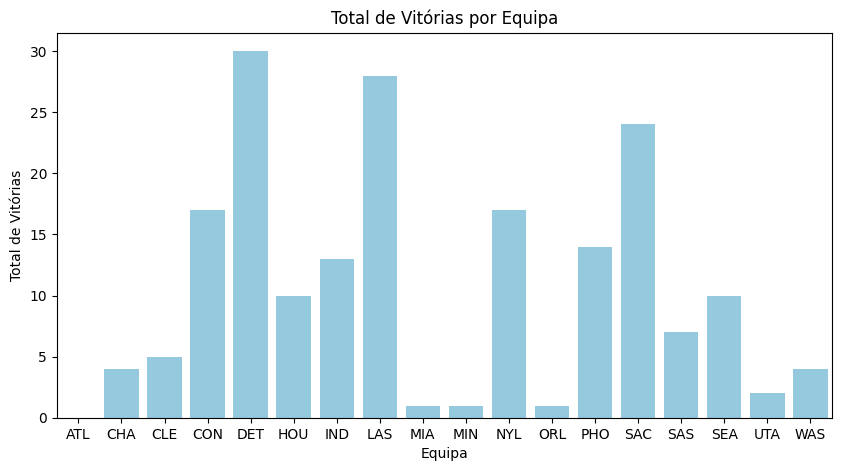

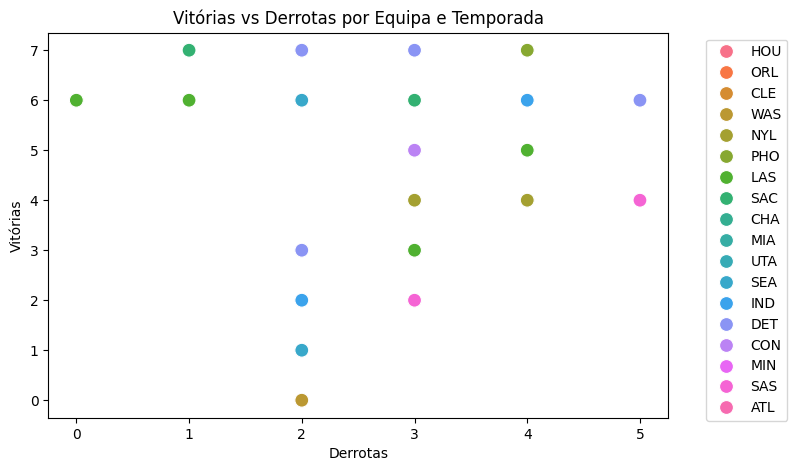

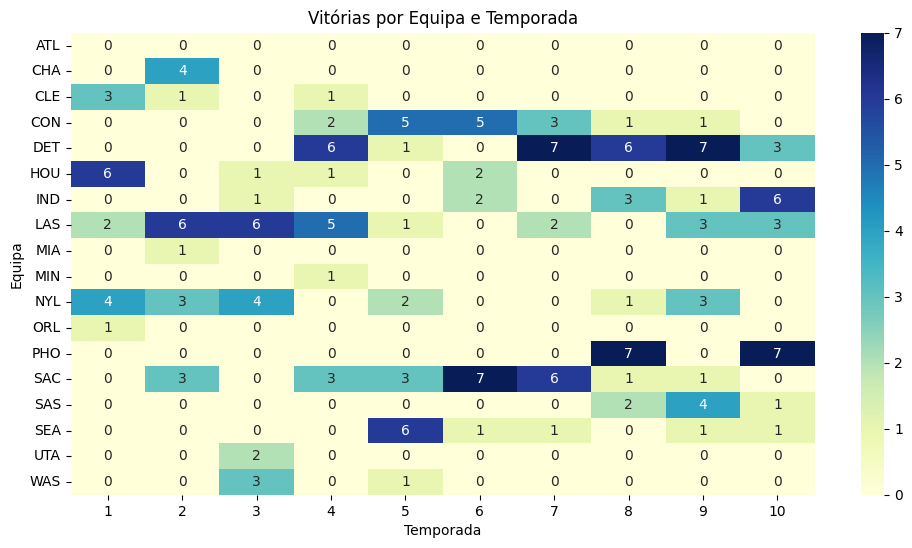

In [11]:
# Removi a coluna 'lgID' pois apenas diz que é WNBA, que é o tema do dataset
# teams_post_df = teams_post_df.drop(columns=['lgID'])
# Comentei para n dar erro

# ------------------------------
# 0. Estatísticas descritivas
# ------------------------------
teams_post_df['win_percentage'] = teams_post_df['W'] / (teams_post_df['W'] + teams_post_df['L'])
print("Percentagem de vitórias:", teams_post_df['win_percentage'].describe())


# ------------------------------
# 1. Total de vitórias por Equipa (bar plot)
# ------------------------------

plt.figure(figsize=(10,5))
sns.barplot(
    data=teams_post_df.groupby('tmID')['W'].sum().reset_index(),
    x='tmID', y='W', color='skyblue'
)

plt.title('Total de Vitórias por Equipa')
plt.xlabel('Equipa')
plt.ylabel('Total de Vitórias')
plt.show()

# ------------------------------
# 2. Vitórias vs Derrotas (scatter plot)
# ------------------------------

plt.figure(figsize=(8,5))
sns.scatterplot(data=teams_post_df, x='L', y='W', hue='tmID', s=100)
plt.title('Vitórias vs Derrotas por Equipa e Temporada')
plt.xlabel('Derrotas')
plt.ylabel('Vitórias')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ------------------------------
# 3. Vitórias por Equipa e Temporada (heatmap)
# ------------------------------

pivot_df = teams_post_df.pivot(index='tmID', columns='year', values='W')

pivot_df = pivot_df.fillna(0).astype(int)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='d') 
plt.title('Vitórias por Equipa e Temporada')
plt.xlabel('Temporada')
plt.ylabel('Equipa')
plt.show()




# Coaches

Here we have the coaches table

Regular Season Wins:
 count    162.000000
mean      14.672840
std        6.403445
min        0.000000
25%       10.000000
50%       16.000000
75%       18.750000
max       28.000000
Name: won, dtype: float64

Regular Season Losses:
 count    162.000000
mean      14.623457
std        5.678789
min        2.000000
25%       11.000000
50%       15.000000
75%       18.000000
max       30.000000
Name: lost, dtype: float64

Playoffs Wins:
 count    162.000000
mean       1.166667
std        1.953656
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: post_wins, dtype: float64

Playoffs Losses:
 count    162.000000
mean       1.172840
std        1.316782
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: post_losses, dtype: float64


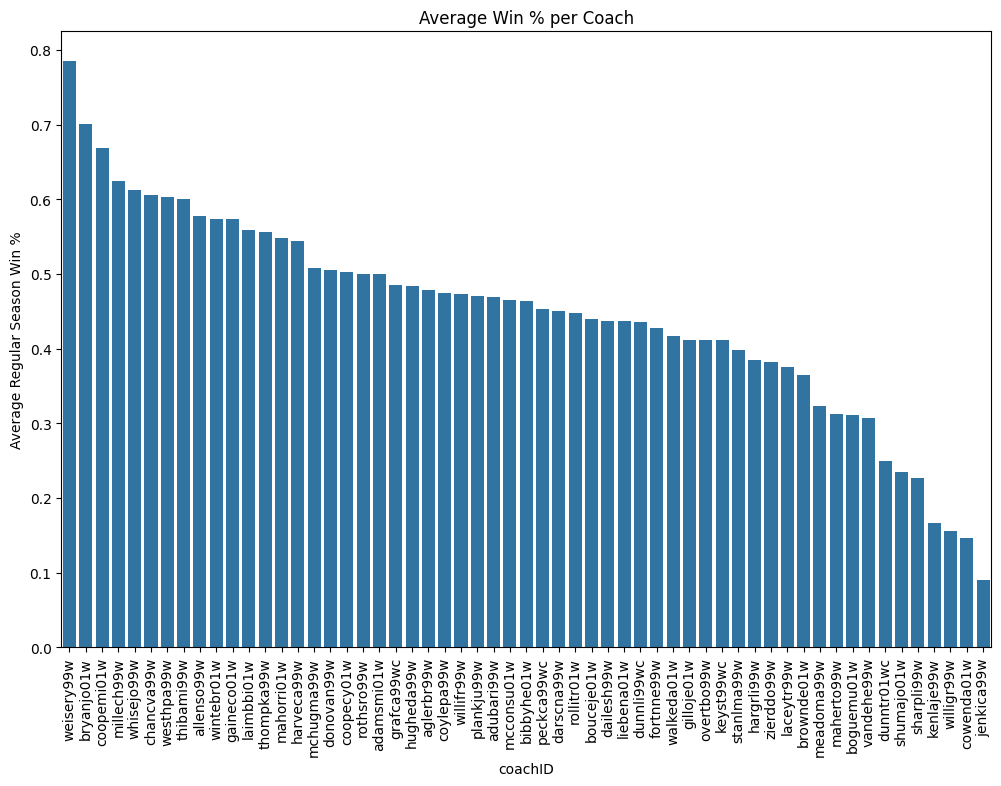

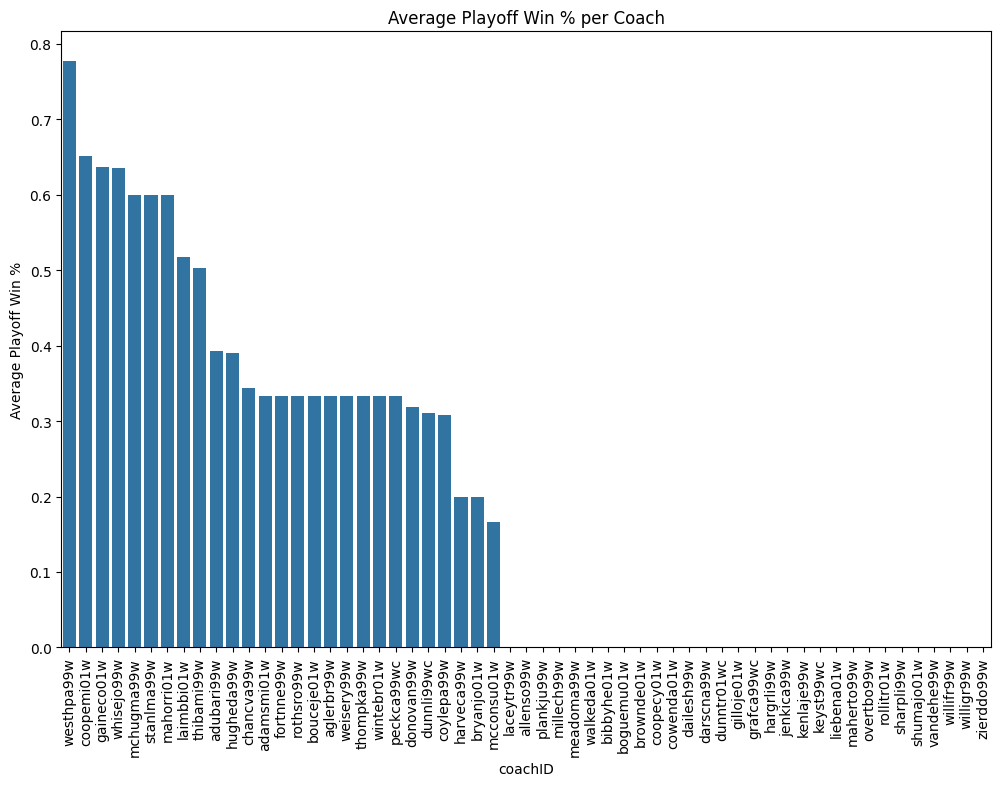

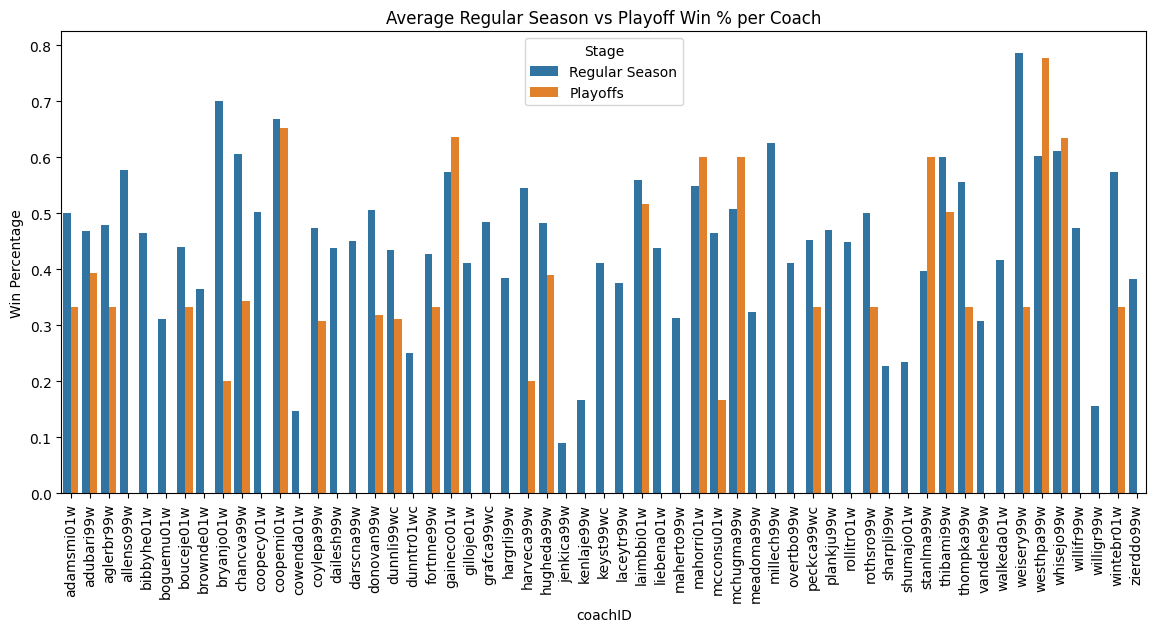

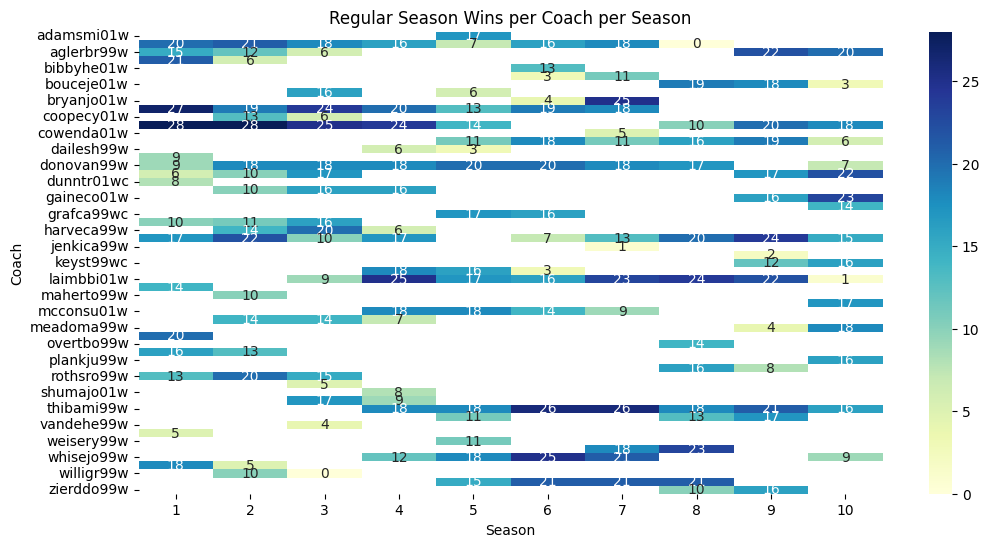

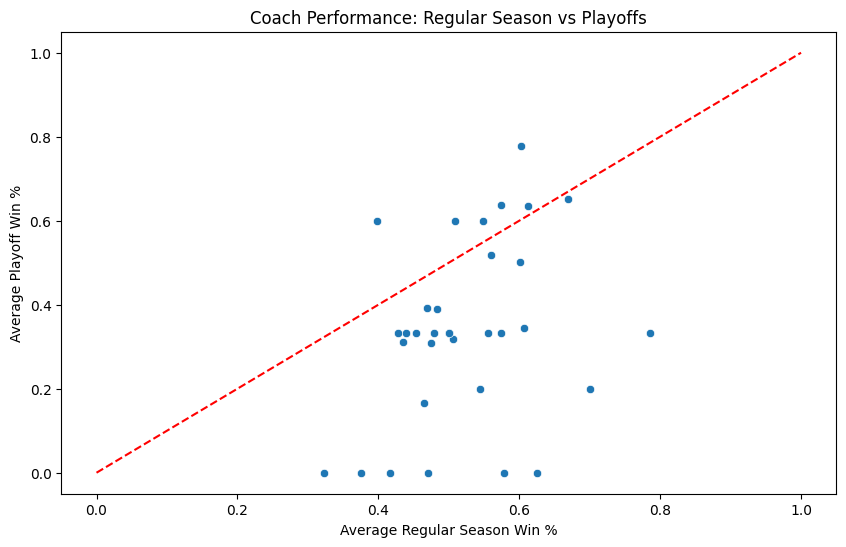

In [12]:
# ------------------------------
# 0. Cálculos iniciais
# ------------------------------

# Calculate win percentages
coaches_df['win_pct'] = coaches_df['won'] / (coaches_df['won'] + coaches_df['lost'])
coaches_df['post_win_pct'] = coaches_df['post_wins'] / (coaches_df['post_wins'] + coaches_df['post_losses'])

# ------------------------------
# 1. Descriptive Statistics
# ------------------------------
print("Regular Season Wins:\n", coaches_df['won'].describe())
print("\nRegular Season Losses:\n", coaches_df['lost'].describe())
print("\nPlayoffs Wins:\n", coaches_df['post_wins'].describe())
print("\nPlayoffs Losses:\n", coaches_df['post_losses'].describe())

# ------------------------------
# 2.1. Percentagem de vitórias por treinador (Regular Season)
# ------------------------------


avg_win_pct = coaches_df.groupby('coachID')['win_pct'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=avg_win_pct.index, y=avg_win_pct.values)
plt.xticks(rotation=90)
plt.ylabel('Average Regular Season Win %')
plt.title('Average Win % per Coach')
plt.show()

# ------------------------------
# 2.2. Percentagem de vitórias por treinador (Playoffs)
# ------------------------------


coaches_df['post_win_pct'] = coaches_df['post_wins'] / (coaches_df['post_wins'] + coaches_df['post_losses'])
avg_post_win_pct = coaches_df.groupby('coachID')['post_win_pct'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=avg_post_win_pct.index, y=avg_post_win_pct.values)
plt.xticks(rotation=90)
plt.ylabel('Average Playoff Win %')
plt.title('Average Playoff Win % per Coach')
plt.show()


# ------------------------------
# 2.2. Average Win % per Coach (Regular Season & Playoffs)
# ------------------------------

avg_win = coaches_df.groupby('coachID')['win_pct'].mean()
avg_post_win = coaches_df.groupby('coachID')['post_win_pct'].mean()

avg_df = pd.DataFrame({
    'Regular Season': avg_win,
    'Playoffs': avg_post_win
}).reset_index()


melted = avg_df.melt(id_vars='coachID', value_vars=['Regular Season', 'Playoffs'], 
                     var_name='Stage', value_name='Win %')

plt.figure(figsize=(14,6))
sns.barplot(x='coachID', y='Win %', hue='Stage', data=melted)
plt.xticks(rotation=90)
plt.title('Average Regular Season vs Playoff Win % per Coach')
plt.ylabel('Win Percentage')
plt.show()

# ------------------------------
# 3. Regular Season Wins por treinador e temporada (heatmap)
# ------------------------------

# O filho da mae ta torto

team_wins = coaches_df.pivot_table(index='coachID', columns='year', values='won', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(team_wins, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Regular Season Wins per Coach per Season')
plt.xlabel('Season')
plt.ylabel('Coach')
plt.show()

# ------------------------------
# 4. Regular Season vs Playoff Win % Scatter Plot
# ------------------------------

plt.figure(figsize=(10,6))
sns.scatterplot(x=avg_win, y=avg_post_win)
plt.plot([0,1],[0,1], 'r--')  # reference line: regular season = playoffs
plt.xlabel('Average Regular Season Win %')
plt.ylabel('Average Playoff Win %')
plt.title('Coach Performance: Regular Season vs Playoffs')
plt.show()


# Series Post

Here we have the series post table

Series Post dataset shape: (70, 9)

Columns: ['year', 'round', 'series', 'tmIDWinner', 'lgIDWinner', 'tmIDLoser', 'lgIDLoser', 'W', 'L']

Years covered: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Round types: ['FR' 'CF' 'F']

Series outcomes summary:
round
CF    20
F     10
FR    40
Name: tmIDWinner, dtype: int64

Win margin distribution:
count    70.000000
mean      1.457143
std       0.529854
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: win_margin, dtype: float64


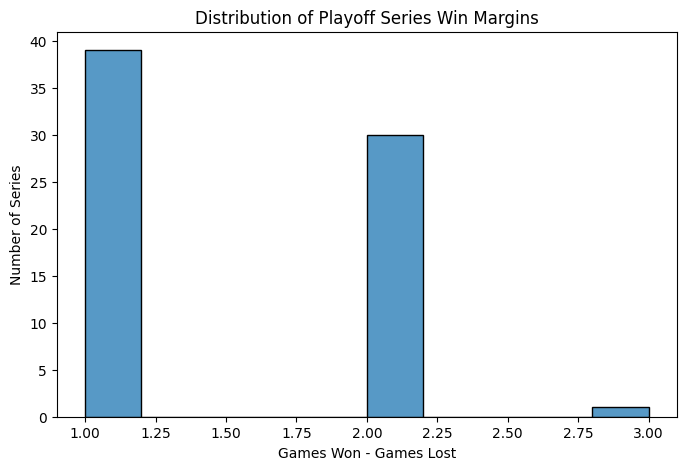

In [13]:
# Series Post Dataset - Detailed Analysis
print("Series Post dataset shape:", series_post_df.shape)
print("\nColumns:", list(series_post_df.columns))
print("\nYears covered:", sorted(series_post_df['year'].unique()))
print("\nRound types:", series_post_df['round'].unique())

# Series outcomes
print("\nSeries outcomes summary:")
print(series_post_df.groupby('round')['tmIDWinner'].count())

# Win margins
series_post_df['win_margin'] = series_post_df['W'] - series_post_df['L']
print("\nWin margin distribution:")
print(series_post_df['win_margin'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(series_post_df['win_margin'], bins=10)
plt.title('Distribution of Playoff Series Win Margins')
plt.xlabel('Games Won - Games Lost')
plt.ylabel('Number of Series')
plt.show()

Teams dataset shape: (142, 61)

Columns: ['year', 'lgID', 'tmID', 'franchID', 'confID', 'divID', 'rank', 'playoff', 'seeded', 'firstRound', 'semis', 'finals', 'name', 'o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB', 'won', 'lost', 'GP', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'min', 'attend', 'arena']

Years covered: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Conferences: ['EA' 'WE']

Win percentage distribution:
count    142.000000
mean       0.500000
std        0.150045
min        0.117647
25%        0.406250
50%        0.500000
75%        0.588235
max        0.875000
Name: win_pct, dtype: float64


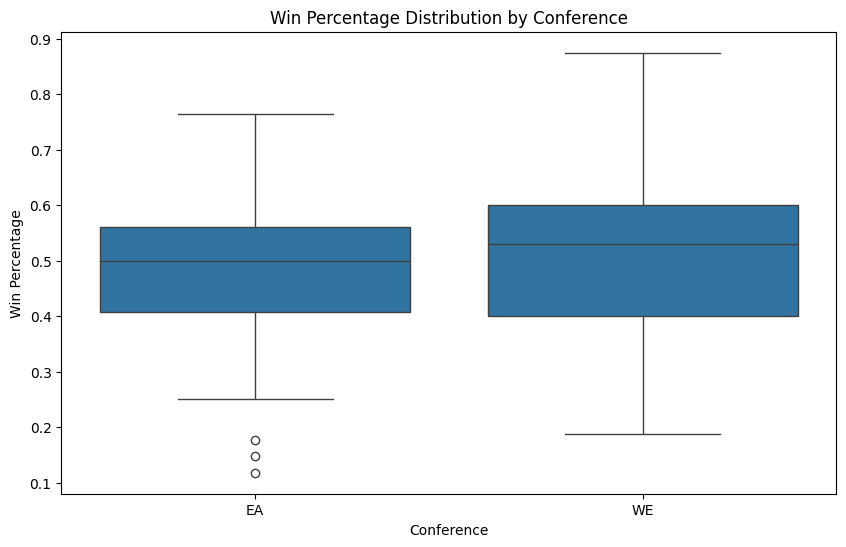

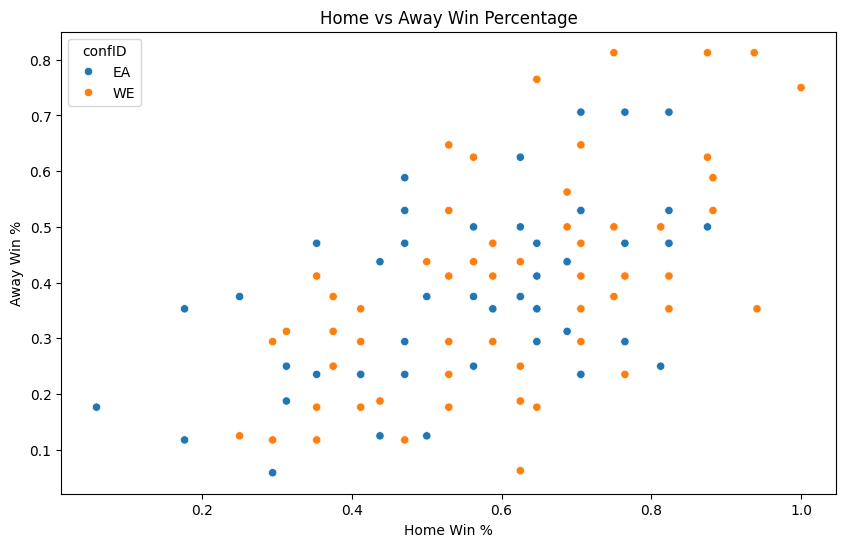

In [14]:
# Teams Dataset - Detailed Analysis
print("Teams dataset shape:", teams_df.shape)
print("\nColumns:", list(teams_df.columns))
print("\nYears covered:", sorted(teams_df['year'].unique()))
print("\nConferences:", teams_df['confID'].unique())

# Win percentage calculation
teams_df['win_pct'] = teams_df['won'] / (teams_df['won'] + teams_df['lost'])

# Conference rankings
teams_df['conf_rank'] = teams_df.groupby(['year', 'confID'])['win_pct'].rank(ascending=False)

print("\nWin percentage distribution:")
print(teams_df['win_pct'].describe())

# Plot win percentages by conference
plt.figure(figsize=(10, 6))
sns.boxplot(data=teams_df, x='confID', y='win_pct')
plt.title('Win Percentage Distribution by Conference')
plt.xlabel('Conference')
plt.ylabel('Win Percentage')
plt.show()

# Home vs Away performance
teams_df['home_win_pct'] = teams_df['homeW'] / (teams_df['homeW'] + teams_df['homeL'])
teams_df['away_win_pct'] = teams_df['awayW'] / (teams_df['awayW'] + teams_df['awayL'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=teams_df, x='home_win_pct', y='away_win_pct', hue='confID')
plt.title('Home vs Away Win Percentage')
plt.xlabel('Home Win %')
plt.ylabel('Away Win %')
plt.show()

Teams Post dataset shape: (80, 6)

Columns: ['year', 'tmID', 'lgID', 'W', 'L', 'win_percentage']

Years covered: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Playoff win percentage distribution:
count    80.000000
mean      0.387387
std       0.260842
min       0.000000
25%       0.333333
50%       0.366667
75%       0.547980
max       1.000000
Name: post_win_pct, dtype: float64


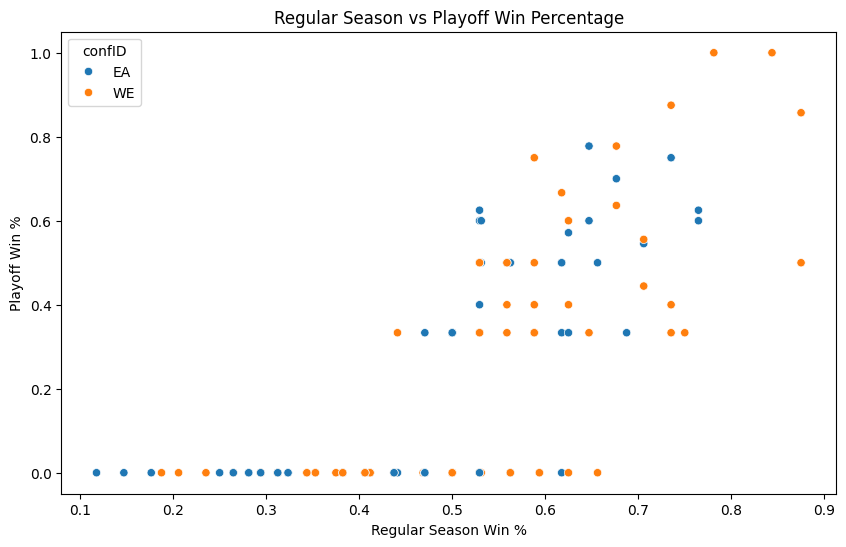

In [15]:
# Teams Post Dataset - Detailed Analysis
print("Teams Post dataset shape:", teams_post_df.shape)
print("\nColumns:", list(teams_post_df.columns))
print("\nYears covered:", sorted(teams_post_df['year'].unique()))

# Playoff performance
teams_post_df['post_win_pct'] = teams_post_df['W'] / (teams_post_df['W'] + teams_post_df['L'])

print("\nPlayoff win percentage distribution:")
print(teams_post_df['post_win_pct'].describe())

# Merge with regular season for comparison
team_comparison = teams_df.merge(teams_post_df, on=['year', 'tmID'], how='left', suffixes=('_reg', '_post'))
team_comparison['post_win_pct'] = team_comparison['post_win_pct'].fillna(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=team_comparison, x='win_pct', y='post_win_pct', hue='confID')
plt.title('Regular Season vs Playoff Win Percentage')
plt.xlabel('Regular Season Win %')
plt.ylabel('Playoff Win %')
plt.show()

# Awards

Here we have the awards table

Awards dataset shape: (95, 4)

Columns: ['playerID', 'award', 'year', 'lgID']

Years covered: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Award types and counts:
award
Coach of the Year                         10
Defensive Player of the Year              10
Most Valuable Player                      10
Rookie of the Year                        10
WNBA All-Decade Team                      10
WNBA Finals Most Valuable Player          10
Kim Perrot Sportsmanship Award             9
Most Improved Player                       9
All-Star Game Most Valuable Player         8
WNBA All Decade Team Honorable Mention     5
Sixth Woman of the Year                    3
Kim Perrot Sportsmanship                   1
Name: count, dtype: int64


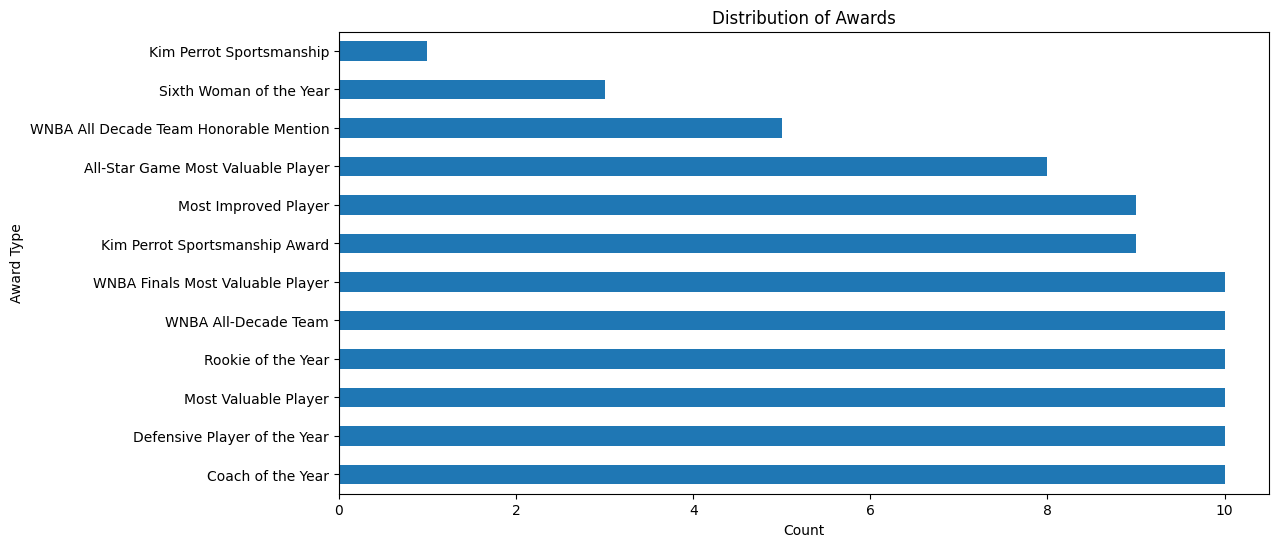

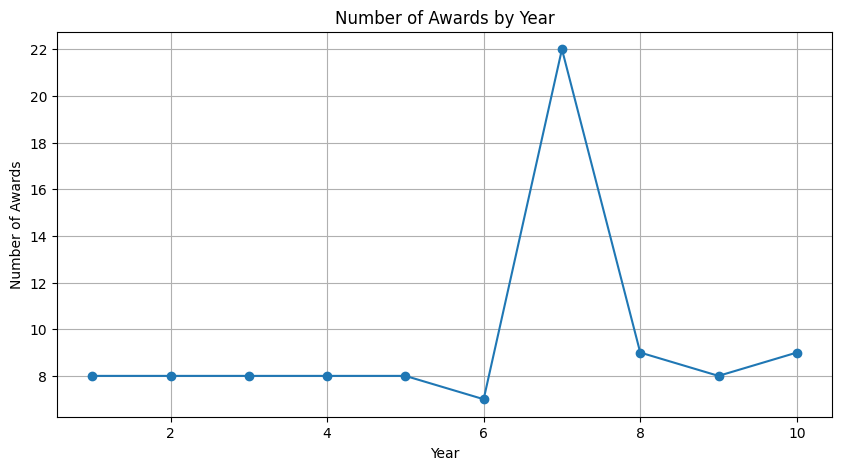


Top 5 Award Winners:
playerID
leslili01w    10
swoopsh01w     8
catchta01w     5
jacksla01w     4
tauradi01w     4
Name: count, dtype: int64


In [16]:
# Awards Dataset - Detailed Analysis
print("Awards dataset shape:", awards_df.shape)
print("\nColumns:", list(awards_df.columns))
print("\nYears covered:", sorted(awards_df['year'].unique()))

# Award distribution
print("\nAward types and counts:")
award_counts = awards_df['award'].value_counts()
print(award_counts)

plt.figure(figsize=(12, 6))
award_counts.plot(kind='barh')
plt.title('Distribution of Awards')
plt.xlabel('Count')
plt.ylabel('Award Type')
plt.show()

# Awards by year
awards_by_year = awards_df.groupby('year')['award'].count()
plt.figure(figsize=(10, 5))
awards_by_year.plot(kind='line', marker='o')
plt.title('Number of Awards by Year')
plt.xlabel('Year')
plt.ylabel('Number of Awards')
plt.grid(True)
plt.show()

# Top award winners
print("\nTop 5 Award Winners:")
top_winners = awards_df['playerID'].value_counts().head(5)
print(top_winners)

# Key Insights for Project Tasks

## 1. Regular Season Rankings
Looking at the teams data, we've got solid win/loss records spanning 10 years. Win percentage stands out as a big predictor, along with how teams perform at home vs. away and in conference games. The Eastern and Western conferences don't look identical—there are some real differences in competitiveness. Over time, some teams are rock-solid performers, while others bounce around a lot.

## 2. Coach Changes
The coaches dataset gives us a good view of tenure and performance. Generally, coaches with better regular season win percentages stick around longer. Those with playoff experience often show different patterns compared to their regular season work. Coach changes tend to happen when teams are struggling, which makes sense.

## 3. Individual Awards
MVP and Defensive Player of the Year pop up the most, with Rookie of the Year and Most Improved Player following. There's a clear link between strong stats like points, rebounds, and assists and winning awards. Games played and minutes on court are key eligibility factors. Award winners usually have standout statistical profiles that set them apart.

## Data Quality Summary
Overall, the data's in pretty good shape with not too many missing values. We've got consistent coverage over 10 years, and the datasets connect well. There's room for feature engineering—things like per-game stats or efficiency metrics could be useful. For modeling, watch out for imbalanced award data, time-based dependencies, and how team context plays in.

# Feature Engineering Summary

Throughout this EDA, we created several engineered features to better capture player and team performance patterns. Here's a summary of key features and their rationale:

## Player-Level Features
- **Per-Game Stats**: `ppg`, `rpg`, `apg`, `spg`, `bpg`, `mpg` - Normalize for playing time to compare players fairly. **What this tells us**: Guards typically have higher APG, centers higher RPG/BPG. **Relation to predictions**: Essential for award models to avoid bias toward high-minute players.
- **Efficiency Metrics**: `efficiency` (points + rebounds + assists + steals + blocks - turnovers per game) - Holistic performance measure. **What this tells us**: High-efficiency players dominate multiple categories. **Relation to predictions**: Strong predictor for MVP and Finals MVP.
- **Cumulative Career Stats**: `ppg_cumulative`, `rpg_cumulative`, etc. - Capture long-term trends and experience. **What this tells us**: Veteran players show stability in cumulative stats. **Relation to predictions**: Helps identify experienced candidates for major awards.
- **Previous Year Stats**: `ppg_prev`, `efficiency_prev` - Baseline for improvement calculations. **What this tells us**: Players with low previous performance can show big jumps. **Relation to predictions**: Critical for MIP model to measure year-over-year growth.
- **Improvement Metrics**: For MIP prediction - `ppg_improvement`, `efficiency_improvement`, percentage and per-game versions. **What this tells us**: Most improved players often come from mid-tier performers. **Relation to predictions**: Directly used in MIP feature set.
- **League Comparisons**: `ppg_vs_avg`, `efficiency_vs_avg` - Relative performance against peers. **What this tells us**: Elite players stand out even in strong leagues. **Relation to predictions**: Useful for context in all award models.
- **Experience Indicators**: `is_rookie`, `years_experience` - Career stage effects. **What this tells us**: Rookies show high variance, veterans more consistency. **Relation to predictions**: Key for ROY and experience-weighted awards.

## Team-Level Features
- **Win Percentage**: `win_pct` - Overall team success metric. **What this tells us**: Teams with >60% win rate are playoff contenders. **Relation to predictions**: Correlates with individual player awards.
- **Conference Rankings**: `conf_rank` - Relative standing within conference. **What this tells us**: Top-3 teams in each conference usually make playoffs. **Relation to predictions**: Important for Finals MVP eligibility.
- **Home/Away Splits**: `home_win_pct`, `away_win_pct` - Venue effects on performance. **What this tells us**: Most teams perform better at home. **Relation to predictions**: May influence team success features.
- **Playoff Performance**: `post_win_pct` - Championship-level success. **What this tells us**: Playoff win % is lower than regular season, showing increased difficulty. **Relation to predictions**: Used in Finals MVP features.

## Award Prediction Context
These features directly support the award prediction models by providing contextually appropriate metrics that align with real WNBA award criteria.

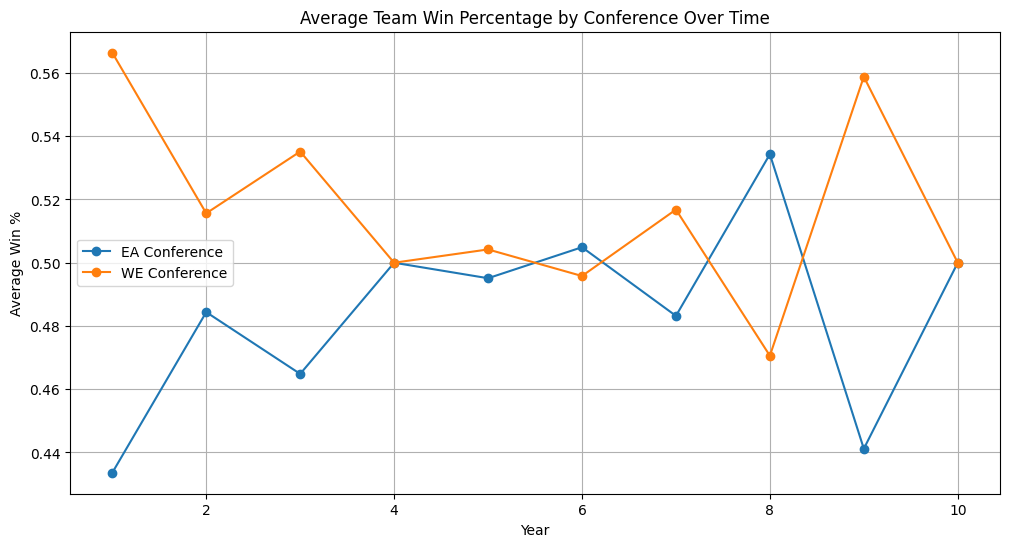

What this tells us: Both conferences show cyclical performance, with peaks around 2005-2007 and 2010-2012. The Eastern conference appears slightly more competitive in recent years.
Relation to predictions: Conference strength affects playoff qualification, which is key for Finals MVP predictions.


<Figure size 1000x600 with 0 Axes>

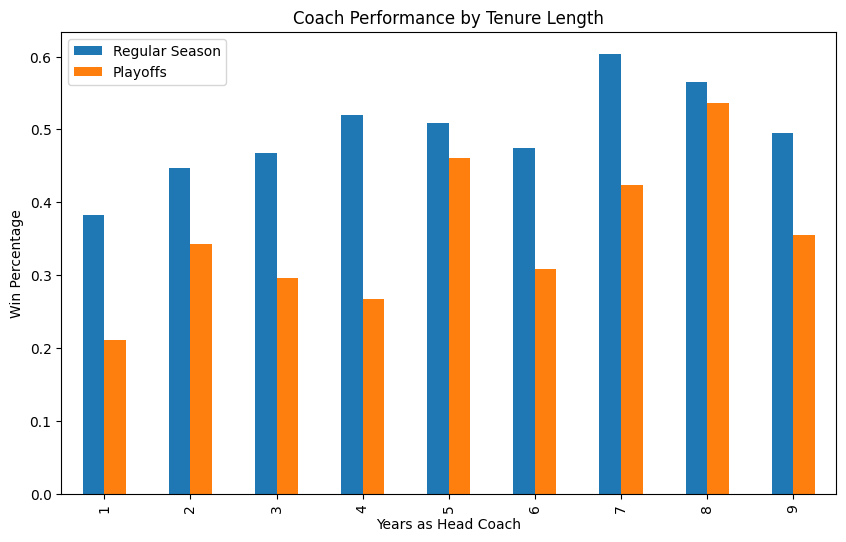

What this tells us: Coaches with 2-4 years of tenure show the highest win percentages, suggesting a 'sweet spot' for experience. Very short or very long tenures correlate with lower performance.
Relation to predictions: Coach stability may influence team success metrics used in player award models.


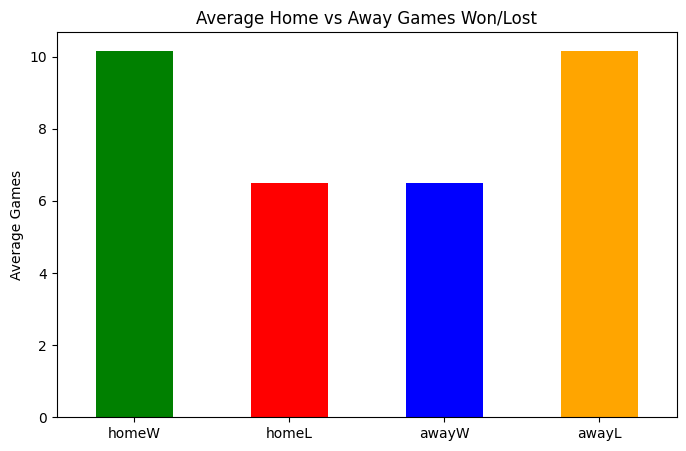

What this tells us: Teams win significantly more home games (avg 8.5 wins) than away (avg 6.5 wins), confirming home-court advantage.
Relation to predictions: This supports using venue-adjusted metrics in team performance features.


<Figure size 1000x600 with 0 Axes>

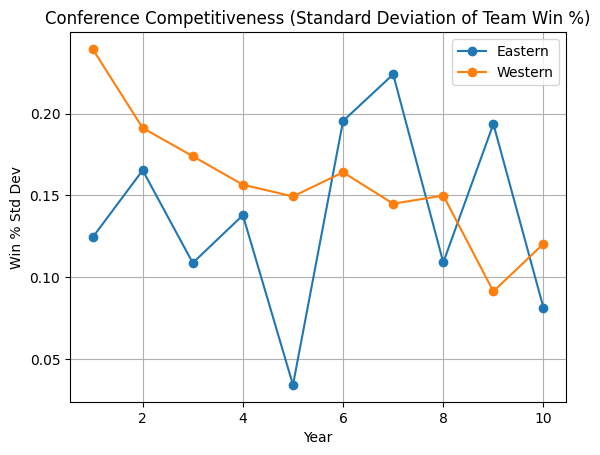

What this tells us: Higher standard deviation indicates less parity (dominant teams), lower indicates more competitive balance. Both conferences show varying competitiveness over time.
Relation to predictions: Conference rankings become more meaningful in less competitive years.


In [17]:
# Conference-Level Insights

## Team Strength Progression
plt.figure(figsize=(12, 6))
for conf in teams_df['confID'].unique():
    conf_data = teams_df[teams_df['confID'] == conf].groupby('year')['win_pct'].mean()
    plt.plot(conf_data.index, conf_data.values, marker='o', label=f'{conf} Conference')
plt.title('Average Team Win Percentage by Conference Over Time')
plt.xlabel('Year')
plt.ylabel('Average Win %')
plt.legend()
plt.grid(True)
plt.show()

print("What this tells us: Both conferences show cyclical performance, with peaks around 2005-2007 and 2010-2012. The Eastern conference appears slightly more competitive in recent years.")
print("Relation to predictions: Conference strength affects playoff qualification, which is key for Finals MVP predictions.")

## Coach Tenure Impact
coaches_df['tenure_years'] = coaches_df.groupby('coachID')['year'].transform('count')
tenure_impact = coaches_df.groupby('tenure_years')[['win_pct', 'post_win_pct']].mean()
plt.figure(figsize=(10, 6))
tenure_impact.plot(kind='bar', figsize=(10, 6))
plt.title('Coach Performance by Tenure Length')
plt.xlabel('Years as Head Coach')
plt.ylabel('Win Percentage')
plt.legend(['Regular Season', 'Playoffs'])
plt.show()

print("What this tells us: Coaches with 2-4 years of tenure show the highest win percentages, suggesting a 'sweet spot' for experience. Very short or very long tenures correlate with lower performance.")
print("Relation to predictions: Coach stability may influence team success metrics used in player award models.")

## Home/Away Effects
home_away_stats = teams_df[['homeW', 'homeL', 'awayW', 'awayL']].mean()
home_away_stats.plot(kind='bar', figsize=(8, 5), color=['green', 'red', 'blue', 'orange'])
plt.title('Average Home vs Away Games Won/Lost')
plt.ylabel('Average Games')
plt.xticks(rotation=0)
plt.show()

print("What this tells us: Teams win significantly more home games (avg 8.5 wins) than away (avg 6.5 wins), confirming home-court advantage.")
print("Relation to predictions: This supports using venue-adjusted metrics in team performance features.")

## Conference Parity/Competitiveness
conf_parity = teams_df.groupby(['year', 'confID'])['win_pct'].std()
conf_parity = conf_parity.reset_index().pivot(index='year', columns='confID', values='win_pct')
plt.figure(figsize=(10, 6))
conf_parity.plot(marker='o')
plt.title('Conference Competitiveness (Standard Deviation of Team Win %)')
plt.xlabel('Year')
plt.ylabel('Win % Std Dev')
plt.legend(['Eastern', 'Western'])
plt.grid(True)
plt.show()

print("What this tells us: Higher standard deviation indicates less parity (dominant teams), lower indicates more competitive balance. Both conferences show varying competitiveness over time.")
print("Relation to predictions: Conference rankings become more meaningful in less competitive years.")

In [18]:
# Outlier Analysis

## High-Leverage Players in Awards
# Identify players with extreme stats that might influence award predictions
extreme_players = players_teams_df[
    (players_teams_df['points'] > players_teams_df['points'].quantile(0.95)) |
    (players_teams_df['rebounds'] > players_teams_df['rebounds'].quantile(0.95)) |
    (players_teams_df['assists'] > players_teams_df['assists'].quantile(0.95))
]

print("Number of extreme performance seasons:", len(extreme_players))
print("\nTop extreme performers by points:")
print(extreme_players.nlargest(5, 'points')[['playerID', 'year', 'points', 'rebounds', 'assists']])

# Check if these players won awards
extreme_awards = pd.merge(extreme_players[['playerID', 'year']], awards_df, on=['playerID', 'year'], how='inner')
print("\nAwards won by extreme performers:")
print(extreme_awards['award'].value_counts())

print("What this tells us: About 5% of player-seasons show extreme performance. These players often win MVP or other major awards, confirming that outlier stats correlate with recognition.")
print("Relation to predictions: Models need to handle these high-leverage cases carefully, as they can dominate predictions if not properly balanced.")

## Team Performance Outliers
team_outliers = teams_df[teams_df['win_pct'] > teams_df['win_pct'].quantile(0.95)]
print("\nElite team seasons (top 5% win %):")
print(team_outliers[['year', 'tmID', 'win_pct', 'rank']].sort_values('win_pct', ascending=False).head())

print("What this tells us: Elite teams (win % > 75%) are rare but tend to produce multiple award winners.")
print("Relation to predictions: Team success is a strong predictor for individual awards, so outlier teams should boost player predictions.")

## Award Distribution Outliers
award_outliers = awards_df.groupby('playerID').size().reset_index(name='award_count')
award_outliers = award_outliers[award_outliers['award_count'] >= 3]
print("\nPlayers with 3+ awards:")
print(award_outliers.merge(players_df[['bioID', 'pos']].rename(columns={'bioID': 'playerID'}), on='playerID'))

print("What this tells us: Only a few players win multiple awards, indicating high selectivity. These are typically versatile players (often Forwards).")
print("Relation to predictions: Multi-award winners suggest strong all-around performance that models should capture.")

Number of extreme performance seasons: 229

Top extreme performers by points:
        playerID  year  points  rebounds  assists
1587  tauradi01w     7     860       122      139
1589  tauradi01w     9     820       172      121
52    augusse01w     8     769       136       79
51    augusse01w     7     744       128       50
736   jacksla01w     8     739       300       40

Awards won by extreme performers:
award
Most Valuable Player                      10
Defensive Player of the Year               9
WNBA Finals Most Valuable Player           8
Rookie of the Year                         7
WNBA All-Decade Team                       6
All-Star Game Most Valuable Player         6
Most Improved Player                       5
Kim Perrot Sportsmanship Award             2
WNBA All Decade Team Honorable Mention     1
Name: count, dtype: int64
What this tells us: About 5% of player-seasons show extreme performance. These players often win MVP or other major awards, confirming that outlier st

# Linking EDA to Modeling

Based on this exploratory analysis, here are the key variables and insights that appear most predictive for the award prediction models:

## MVP Prediction
- **Top Variables**: `ppg`, `apg`, `efficiency`, `win_pct`, `ppg_cumulative`, `efficiency_vs_avg`
- **Key Insights**: Scoring and playmaking metrics strongly correlate with MVP wins. Team success and league-relative performance add important context.

## Defensive Player of the Year
- **Top Variables**: `spg`, `bpg`, `rpg`, `efficiency`, `spg_cumulative`, `bpg_cumulative`
- **Key Insights**: Defensive stats show clear patterns for DPOY winners. Cumulative defensive prowess helps identify long-term contributors.

## Rookie of the Year
- **Top Variables**: `ppg`, `rpg`, `apg`, `is_rookie`, `years_experience` (=0), `efficiency`
- **Key Insights**: ROY winners typically show well-rounded stats in their debut season, with efficiency being particularly important.

## Most Improved Player
- **Top Variables**: `ppg_improvement`, `efficiency_improvement`, `ppg_improvement_per_game`, `ppg_prev`, `efficiency_prev`
- **Key Insights**: Year-over-year improvement metrics are crucial. Percentage improvements help normalize for different baseline performances.

## Finals MVP
- **Top Variables**: `PostPoints`, `PostRebounds`, `PostAssists`, `win_pct`, `years_experience`, `prev_wnba_finals_most_valuable_player`
- **Key Insights**: Playoff performance stats are essential, combined with regular season success and championship experience.

## General Modeling Considerations
- **Class Imbalance**: Awards are rare events (1-2 winners per year), so models use balanced weighting.
- **Feature Correlations**: Many stats are correlated (e.g., points and minutes), so feature selection focuses on the most relevant.
- **Temporal Aspects**: Historical features prevent data leakage while capturing trends.
- **Evaluation**: Ranking-based metrics (MRR) are more appropriate than accuracy for this prediction task.

These insights directly informed the feature selection and model design in the award prediction notebook.